<a href="https://colab.research.google.com/github/LanaAlhussaini/G12.DM/blob/main/Reports/Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problem
## 1.1. Project Description:
Stress is one of the most common challenges faced by students today, influencing their academic and personal life. When stress levels become excessive, they can contribute greatly to mental health issues, lower productivity, and poor performance. To address the problem, we can apply two core data analysis approaches: classification and clustering.

## 1.2. Project Motivation
The goal of our project is to help educational institutions in identifying students who are at risk because of extreme stress. Through understanding the founding factors of stress, we aim to help institutions provide quick and appropriate support, making sure that students can manage stress and perform at their best.



---



# 2. Data Mining Task

To address the problem, we will apply two core data mining approaches: classification and clustering.

-Classification: Build predictive models to categorize students into stress levels (Low, Moderate, High) using features related to psychological state, academic workload, social interactions, environment, and physiological indicators.

-Clustering: Group students with similar profiles to uncover hidden patterns, such as students mainly stressed by academic pressure versus those affected by social or environmental conditions. This will provide insights into different stress profiles and support the development of more targeted coping strategies.



---



# 3. Data
##3.1. Dataset Source
The dataset was obtained from [Kaggle](https://www.kaggle.com/datasets/mdsultanulislamovi/student-stress-monitoring-datasets).

##3.2. Dataset Description
-Number of records : 1100

-Number of attributes: 21

-Data types: All attributes are numeric (int64), with one binary categorical attribute ('mental_health_history;).

-Class label: 'stress_level' with 3 classes:

| Code | Stress Level   | Count |
|------|----------------|-------|
| 0    | Low stress     | 373   |
| 1    | Moderate stress| 358   |
| 2    | High stress    | 369   |


This distribution shows that the dataset is fairly balanced across the three categories of stress, which is suitable for classification tasks.

-The dataset is complete ( no missing values).

In [ ]:
import pandas as pd

url="https://raw.githubusercontent.com/LanaAlhussaini/G12.DM/refs/heads/main/Dataset/Raw_dataset.csv"
df = pd.read_csv(url)
##

print(("Dataset shape (Rows, Colums) : ", df.shape))

##

print("Unique classes in strees_level: ", df["stress_level"].unique())

print(df["stress_level"].value_counts())

('Dataset shape (Rows, Colums) : ', (1100, 21))
Unique classes in strees_level:  [1 2 0]
stress_level
0    373
2    369
1    358
Name: count, dtype: int64


In [ ]:
print ("Columns:\n", list(df.columns))

Columns:
 ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression', 'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem', 'noise_level', 'living_conditions', 'safety', 'basic_needs', 'academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns', 'social_support', 'peer_pressure', 'extracurricular_activities', 'bullying', 'stress_level']


In [ ]:
print("Missing values:\n", df.isna().sum())

Missing values:
 anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64


In [ ]:
df.describe()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

##3.3. A sample of the raw dataset


In [ ]:
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


#4. Data Preprocessing
##4.1. Data Analysis
The main steps include:
1.   Missing Values Check - detect any missing data
2.   Five-number Summary - observe the range and spread of numeric features.
3.   Outliers Inspection - identify extreme values using boxplots.
4.   Histograms - explore data distributions
5.   Scatter Plots - study relationships between numeric variables.
6.   Bar Plots - analyze categorical attributes.
7.   Class Label Distribution - verify class balance for the target variable












---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (6, 4)
sns.set(style="whitegrid")

url="https://raw.githubusercontent.com/LanaAlhussaini/G12.DM/refs/heads/main/Dataset/Raw_dataset.csv"
df = pd.read_csv(url)
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


##4.2. Missing Values
We start by checking for any missing or null values to confirm data completeness

In [ ]:
import pandas as pd
url="https://raw.githubusercontent.com/LanaAlhussaini/G12.DM/refs/heads/main/Dataset/Raw_dataset.csv"
df = pd.read_csv(url)
df.isna().sum()

,0
anxiety_level,0
self_esteem,0
mental_health_history,0
depression,0
headache,0
blood_pressure,0
sleep_quality,0
breathing_problem,0
noise_level,0
living_conditions,0


Interpretation:
No missing values were found. The dataset is complete and ready for analysis.

##4.3. Five Number Summary
We summarize key numeric attributes to understand their value ranges and spread.
###Selected attributes:

*   anxiety_level
*   depression
*   self_esteem
*   sleep_quality
*   study_load



---



In [ ]:

five_num = df[['anxiety_level','depression','self_esteem','sleep_quality','study_load']].describe().loc[['min','25%','50%','75%','max']]
five_num


,anxiety_level,depression,self_esteem,sleep_quality,study_load
min,0.0,0.0,0.0,0.0,0.0
25%,6.0,6.0,11.0,1.0,2.0
50%,11.0,12.0,19.0,2.5,2.0
75%,16.0,19.0,26.0,4.0,3.0
max,21.0,27.0,30.0,5.0,5.0


**Interpretation of Five Number Summary**

The summary shows that most students have moderate anxiety (median = 11) and moderate depression (median = 12), but both variables have wide ranges, indicating possible outliers. Self-esteem (median = 19) is generally high, while sleep quality (median = 2.5) and study load (median = 2) are around average levels. Overall, the data suggests that stress-related factors vary widely among students, highlighting differences in their mental and academic conditions.



---



##4.4. Outliers Inspection (Boxplots)
Boxplots are used to visually identify extreme or unusual values.

**Selected Attributes:**
*   anxiety_level
*   depression
*   self_esteem




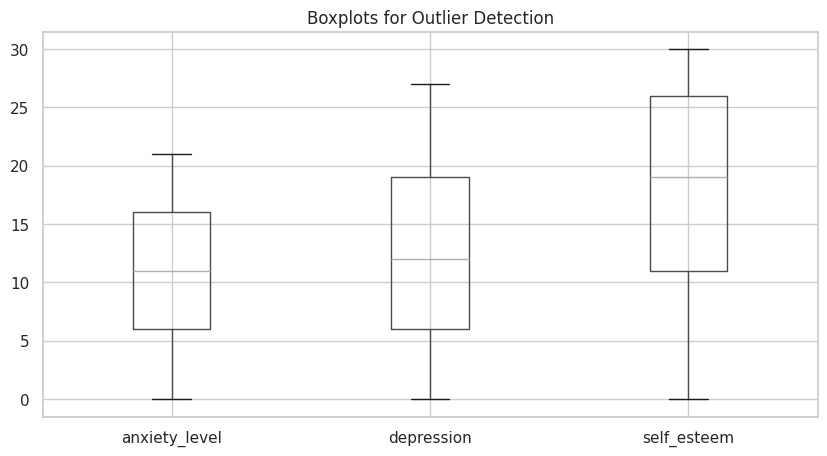

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['anxiety_level','depression','self_esteem']

plt.figure(figsize=(10,5))
df[cols].boxplot()
plt.title("Boxplots for Outlier Detection")
plt.show()

**Interpretation of Boxplots**

The boxplots show the spread and symmetry of the main psychological variables.

* Most values fall within normal ranges, with no extreme outliers detected in anxiety, depression, or self-esteem.
*  Self-esteem displays a wider range, meaning students vary more in confidence levels compared to other factors.
* Depression appears slightly more variable than anxiety, suggesting some students experience higher depressive symptoms.


Overall, the distributions are balanced and clean, confirming that the dataset is suitable for further preprocessing and modeling.




---



##4.5. Histograms (Distributions)

Histograms show how numeric values are distributed across their ranges.

**Selected attributes:**
* sleep_quality
* study_load
* social_support



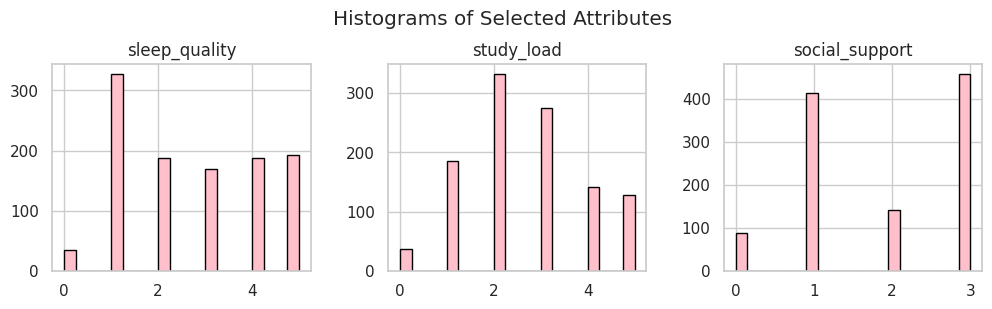

In [ ]:
cols_hist = ['sleep_quality','study_load','social_support']
df[cols_hist].hist(bins=20, layout=(1,3), figsize=(12,3), edgecolor='black' , color= 'pink')
plt.suptitle("Histograms of Selected Attributes")
plt.subplots_adjust(top=0.8)
plt.show()

**Interpretation of Histograms:**

The histograms show the distribution of selected attributes related to students'stress factors:

* Sleep Quality: Most students reported low sleep quality (around levels 1-2), suggesting that poor sleep might be common.

* Study Load: The distribution peaks around levels 2-3, indicating that most students experience a moderate workload.

* Social Support: The data is more polarized, with many students reporting either very low or very high support, implying differences in their social environments.

Overall, the variables show diverse distributions, reflecting how academic pressure, rest quality, and social factors vary across the student population.



---



##4.6. Scatter Plot (Distributions)
Scatter Plots show the realtionship between two numerical values.

Selected attributes:

* self_esteem
* anxiety_level

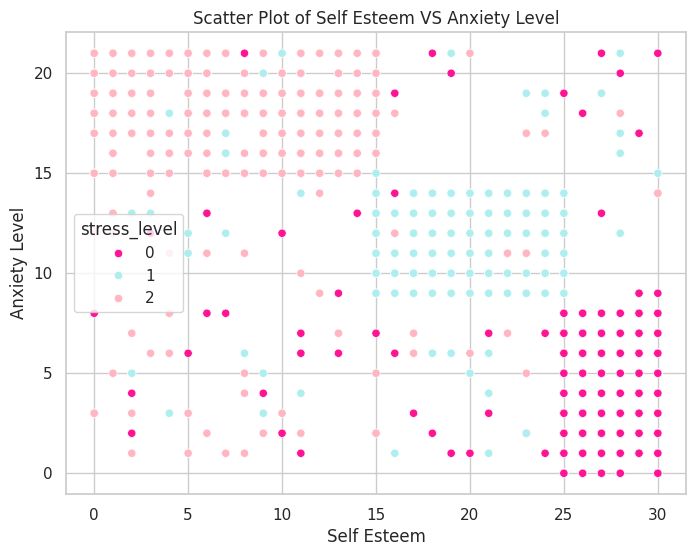

In [ ]:

plt.figure(figsize=(8,6))
sns.scatterplot(x='self_esteem' , y= 'anxiety_level' , data = df , hue= 'stress_level' , palette = ['#ff1493' , '#aeeeee' , '#ffb6c1'] )
plt.title('Scatter Plot of Self Esteem VS Anxiety Level')
plt.xlabel('Self Esteem')
plt.ylabel('Anxiety Level')
plt.show()

**Interpretation of Scatter Plot:**

This scatter plot shows the relationship between self-esteem and anxiety level between the participants.

* There is a negative relationship since when self-esteem increases, anxiety levels tend to decrease.
* The points are fairly distirbuted, suggesting that although the trend is mostly negative, there is still some variation among participants.
* Participants with middle self-esteem show a wide range of anxiety levels, indicating that other factors might also influence anxiety.


Overall: The scatter plot suggests that individuals with higher self-esteem mostly experience lower anxiety levels, showing a negative correlation between the two attributes

##Scatter Plot (Distributions)
Another use of Scatter Plots to show the realtionship between two numerical values.

**Selected attributes:**

* depression
* anxiety_level

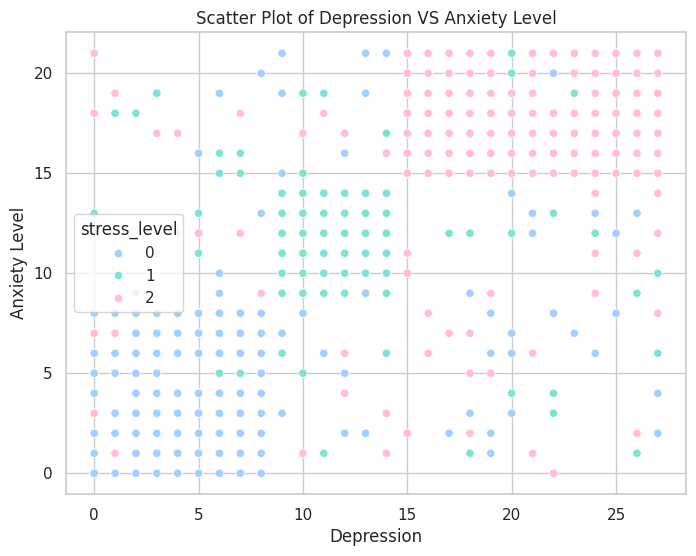

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='depression' , y= 'anxiety_level' , data = df , hue= 'stress_level' , palette = ['#a2cffe' , '#7fe3d3' , '#ffc0cb'] )
plt.title('Scatter Plot of Depression VS Anxiety Level')
plt.xlabel('Depression')
plt.ylabel('Anxiety Level')
plt.show()


**Interpretation of Scatter Plot:**

This scatter plot shows the relationship between depression and anxiety level among the participants.

* There is a positive correlation since when anxiety levels increase, depression levels also increases.
* Most points follow a rising trend, showing that higher anxiety is usually associated with higher depression scores.
* A few data points fall behind from the general pattern, suggesting that some individuals might experience high anxiety without high depression, or the opposite.

Overall: The scatter plot suggests a positive correlation between depression and anxiety level, meaning that participants with higher anxiety levels are generally more likely to show higher levels of depression



---



##4.7. Bar Plot (Distributions)
Bar Plots are used to compare categories or show the frequency of different goups.

**Selected attributes:**

* headache

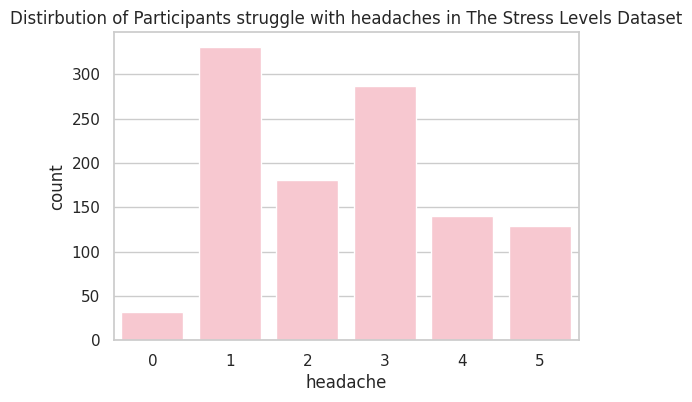

In [ ]:
sns.countplot(x='headache' , color='pink', data=df )
plt.title('Distirbution of Participants struggle with headaches in The Stress Levels Dataset')
plt.show()

**Interpretation of Bar Plot:**

This bar plot displays the distribution of the headache attribute among participants.

* The dataset shows 32 participants without experiencing headaches (category 0).
* 331 participants have a recorded very low headache (category 1).
* 181 participants have a recorded low headache (category 2).
* 287 participants have a recorded moderate headache (category 3).
* 140 participants have a recorded high headache (category 4).
* 129 participants have a recorded very high headache (category 5).
* The 5 categories appear unbalanced, showing a relatively uneven distribution.

Overall: The Bar Plot Shows Most participants reported mild to moderate headache levels (1–3), with fewer experiencing very high levels (4–5). Very few had no headaches at all. This suggests headache is a fairly common symptom in this dataset, peaking at moderate intensity.



---



##4.8. Class Label Bar Plot (Distributions)
Bar Plots are used to display the distirbutions of categorial data and show how many instances fall into which class.

**Selected attributes:**

* stress_level

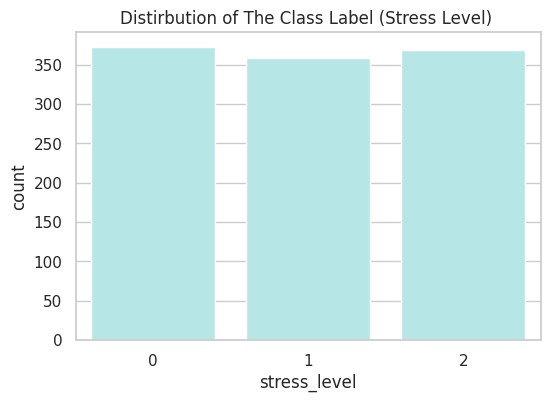

In [ ]:
sns.countplot(x='stress_level' , data = df , color = '#aeeeee')
plt.title('Distirbution of The Class Label (Stress Level) ')
plt.show()

**Interpretation of Bar Plot:**

This bar plot represents the distribution of the stress level attribute among participants.

* There are 373 participants in the low stress category (0).
* 358 participants fall into the medium stress category (1).
* 369 participants are in the high stress category (2).
* The frequencies of all three categories are very close to each other, showing not one is much higher than the rest of stress level groups in the dataset.

Overall: The bar plot indicates a balanced distribution among the three stress level categories, with only small differences in counts. This suggests that stress levels are fairly evenly represented across participants.



---



## Summary
* No missing values were detected.
* The five-number summary revealed varying ranges among numeric attributes.
* Boxplots indicated potential outliers in anxiety and depression levels.
* Histograms showed slightly skewed distributions in some variables.
* Scatter Plot (Depression vs Anxiety) Showed Positive correlation where higher anxiety is generally associated with higher depression.
* Scatter Plot (Self-Esteem vs Anxiety) On the other hand showed Negative * correlation where higher self-esteem tends to correspond with lower anxiety.
* Bar Plot (Headache) Gave an unbalanced distribution,fewer participants showed no signs of headache while the rest rested on a moderate average.
* Bar Plot (Class Label Stress Level) Presented a Balanced distribution where low, moderate, and high stress levels are fairly evenly represented.

These findings will guide preprocessing, focusing on normalization and outlier handling.



---



# 5. Data Mining Techniques
### 5.1 Classification Technique: Decision Trees
The Decision Tree classifier was used to perform the supervised learning task. Decision Trees were selected because they are easy to interpret, can model nonlinear relationships, and provide clear insight into the most influential features. Two splitting criteria were applied:

- Gini Index

- Entropy (Information Gain)

For evaluation, three training/testing partitions were used: 60/40, 70/30, and 80/20. For each split, a Decision Tree was trained using both Gini and Entropy, and the performance was assessed using accuracy, confusion matrices, and class-based precision and recall.

This setup allows us to compare how different impurity measures and training sizes influence the model’s predictive performance.

###5.2 Clustering Technique: K-Means
K-Means clustering was used for the unsupervised learning task. The algorithm was chosen because it is efficient, widely used, and appropriate for numerical datasets after normalization. Before clustering, all input features were standardized using StandardScaler.

Three values of K were tested: K = 2, K = 3, and K = 4. For each K, the following were computed:

- WCSS (Within-Cluster Sum of Squares) for the Elbow Method

- Average Silhouette Score for cluster quality evaluation

Cluster visualizations were also generated using two key features (anxiety_level and depression) to illustrate the separation and compactness of clusters. These evaluations were used to determine the optimal number of clusters.



---



#6. Evaluation and Comparison


##6.1 Classification

Classification is a fundamental technique in machine learning used to predict a categorical class label based on given data(supervised). Essentially, it involves assigning an input data point to one of several predefined classes or categories.

In a classification problem, a model is trained using labeled data—where the output (or target) is known. For instance, in this project, the task is to predict the stress level (Low, Medium, or High) based on certain features like anxiety level, depression, and other health indicators. The model learns patterns from the training data and then uses these patterns to classify unseen data.

Key Steps in Classification:
 1. Importing the Data: The first step is to load the procceces dataset, which contains the features and the target variable ( stress level).
 2. Splitting the Data: The data is typically split into two sets: training (usually 60-80% of the data) and testing (remaining 20-40%). The training set is used to build the model, and the testing set is used to evaluate its performance.
 3. Building the Model: We train a decision tree classifier using algorithms like Gini Index or Entropy to split the data.
 • Gini Index: Measures the impurity of a node (i.e., how mixed the classes are).
 • Entropy (Information Gain): Measures the uncertainty in the data and aims to reduce this uncertainty through splits.
 4. Evaluating the Model: After training, we evaluate the model using metrics such as the Confusion Matrix and classification report. The accuracy, precision, recall, and F1-score provide a complete understanding of the model’s performance.
 5. Prediction: Finally, once the model is trained and evaluated, it can be used to predict the stress level on new, unseen data.


In this project, we use a decision tree classifier to classify stress levels based on various health-related features. We train the model using Gini Index and Entropy and compare their performance using Confusion Matrix and classification reports.

Goal:

The goal of this project is to build a classification model that predicts the stress level of individuals based on features. By evaluating the performance of the model using Confusion Matrix and classification report, we can determine which splitting criterion (Gini or Entropy) performs better for this task.

Importance:

This model has significant potential applications in fields like mental health, where predicting stress levels could help identify individuals who may need medical intervention or further evaluation. The early detection of stress could lead to better health outcomes and improved healthcare interventions.


### 60% Training and 40% testing Classification:

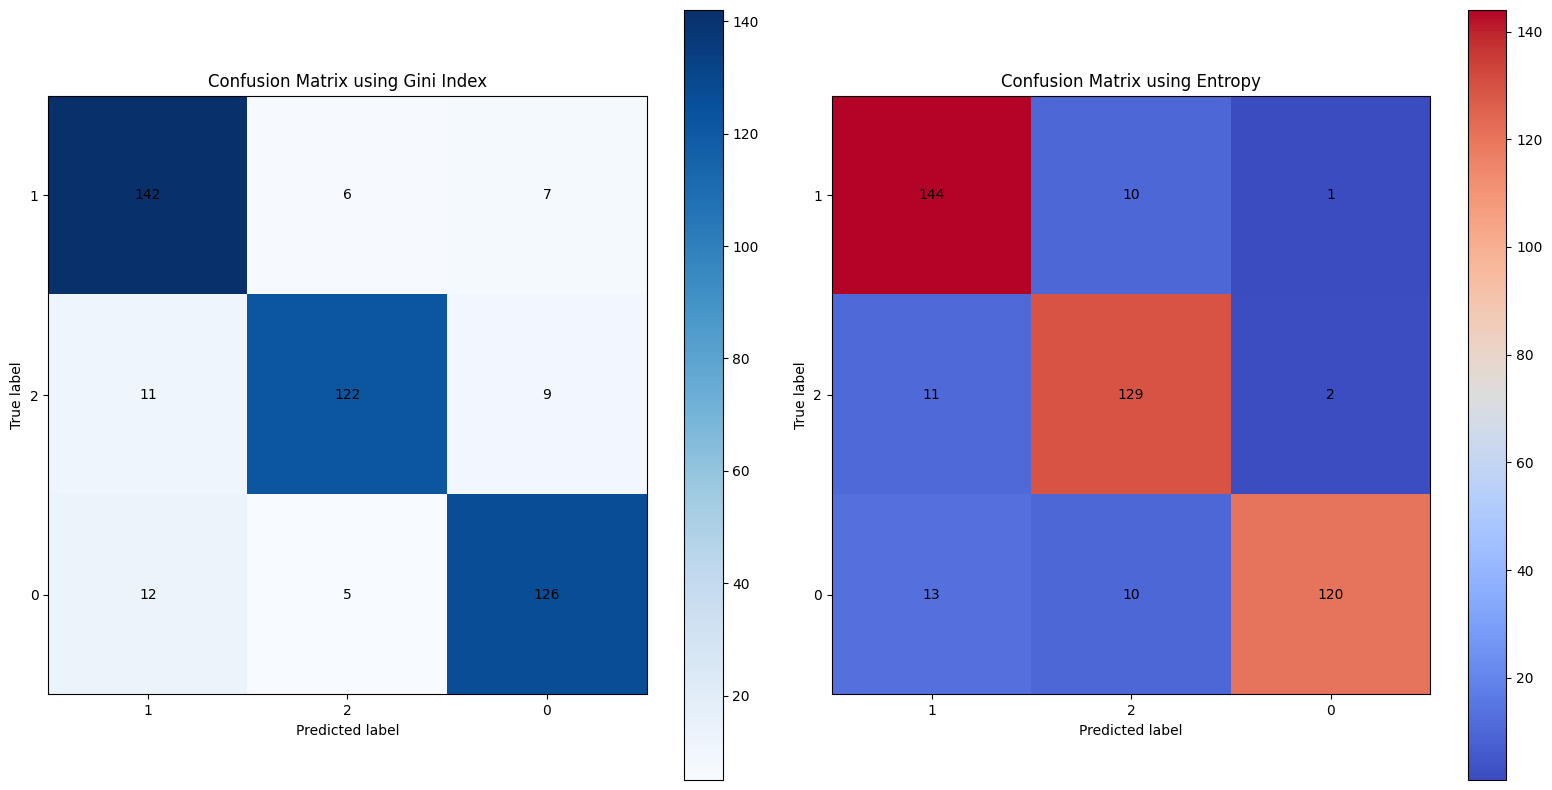


Accuracy using Gini Index: 0.8863636363636364

Classification Report using Gini Index:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89       155
           1       0.92      0.86      0.89       142
           2       0.89      0.88      0.88       143

    accuracy                           0.89       440
   macro avg       0.89      0.89      0.89       440
weighted avg       0.89      0.89      0.89       440


Accuracy using Entropy: 0.8931818181818182

Classification Report using Entropy:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89       155
           1       0.87      0.91      0.89       142
           2       0.98      0.84      0.90       143

    accuracy                           0.89       440
   macro avg       0.90      0.89      0.89       440
weighted avg       0.90      0.89      0.89       440



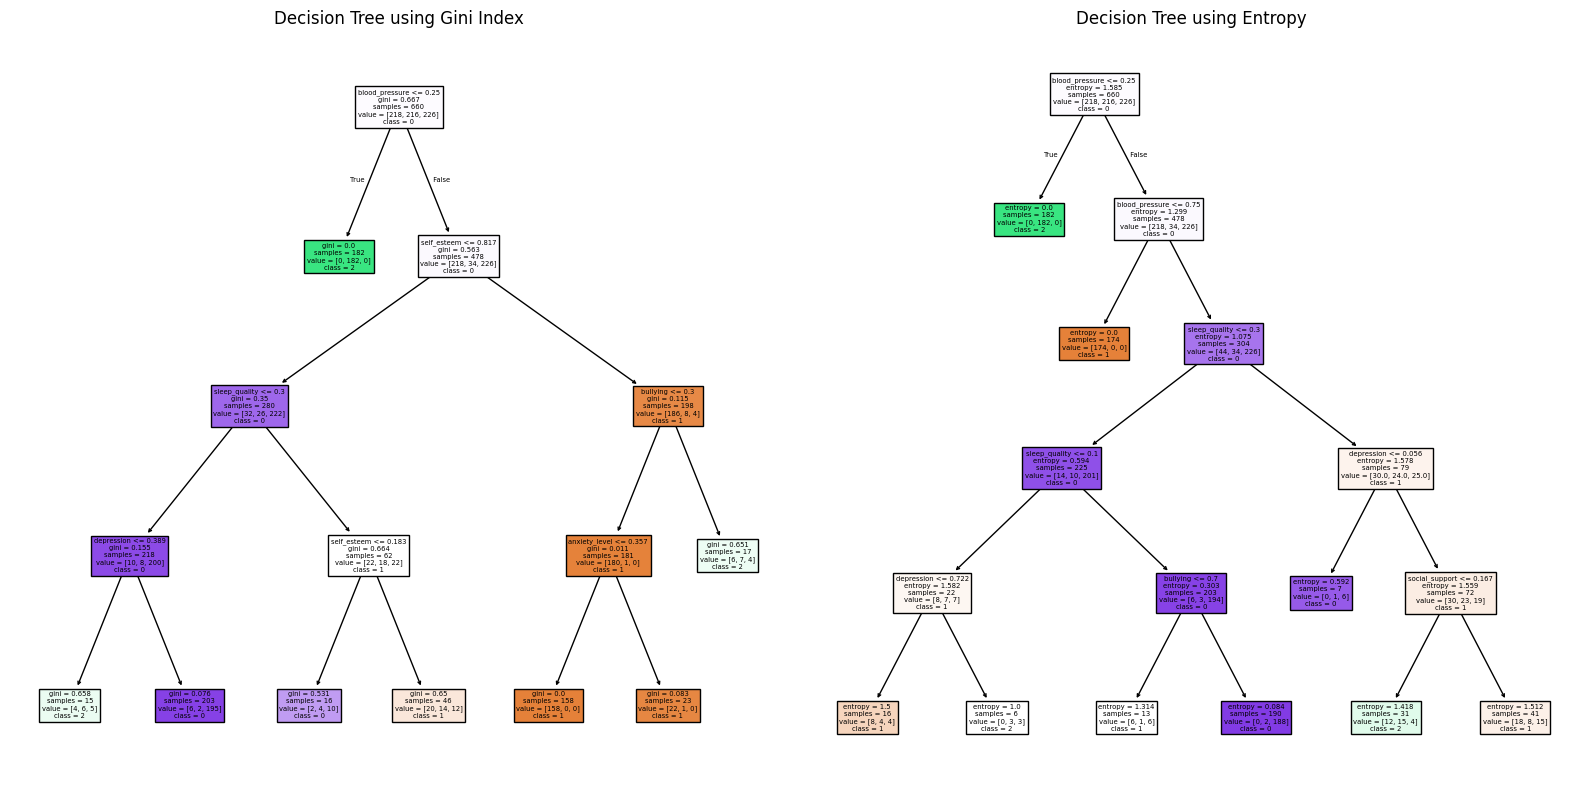

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import pandas as pd

# Load data
data = pd.read_csv("Preprocessed_dataset.csv")

# Separate features and target
X = data.drop(columns=['stress_level'])  # Drop column
y = data['stress_level']  # Target column

# Split data (60% train, 40% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# Train using Gini
clf_gini = DecisionTreeClassifier(max_depth=4, min_samples_split=20, min_samples_leaf=10)
clf_gini.fit(X_train, y_train)

# Train using Entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10, min_samples_leaf=5)  # Depth and splits improved
clf_entropy.fit(X_train, y_train)

# Predictions
y_pred_gini = clf_gini.predict(X_test)
y_pred_entropy = clf_entropy.predict(X_test)

# Accuracy
accuracy_gini = accuracy_score(y_test, y_pred_gini)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

# Classification report
report_gini = classification_report(y_test, y_pred_gini)
report_entropy = classification_report(y_test, y_pred_entropy)

# Confusion matrix
cm_gini = confusion_matrix(y_test, y_pred_gini)
cm_entropy = confusion_matrix(y_test, y_pred_entropy)

# Display Confusion Matrix
cn = data['stress_level'].unique()

# Customize colors (light blue and baby pink)
disp_gini = ConfusionMatrixDisplay(confusion_matrix=cm_gini, display_labels=cn)
disp_entropy = ConfusionMatrixDisplay(confusion_matrix=cm_entropy, display_labels=cn)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Display Confusion Matrix using Gini
disp_gini.plot(cmap='Blues', ax=axes[0], values_format='d')  # Light blue background
axes[0].set_title('Confusion Matrix using Gini Index')
for text in axes[0].texts:
    text.set_color('black')  # Set numbers to black

# Display Confusion Matrix using Entropy
disp_entropy.plot(cmap='coolwarm', ax=axes[1], values_format='d')  # Baby pink background
axes[1].set_title('Confusion Matrix using Entropy')
for text in axes[1].texts:
    text.set_color('black')  # Set numbers to black

plt.tight_layout()
plt.show()

# Print accuracy and classification reports
print("\nAccuracy using Gini Index:", accuracy_gini)
print("\nClassification Report using Gini Index:\n", report_gini)
print("\nAccuracy using Entropy:", accuracy_entropy)
print("\nClassification Report using Entropy:\n", report_entropy)

# Convert class names to string for plot_tree
cn_str = cn.astype(str)

# Display Decision Tree using Gini
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Gini tree
plot_tree(clf_gini, filled=True, ax=axes[0], feature_names=X.columns, class_names=cn_str)
axes[0].set_title('Decision Tree using Gini Index')

# Entropy tree
plot_tree(clf_entropy, filled=True, ax=axes[1], feature_names=X.columns, class_names=cn_str)
axes[1].set_title('Decision Tree using Entropy')

plt.tight_layout()
plt.show()




In [ ]:
cm_gini = confusion_matrix(y_test, y_pred_gini)
cm_entropy = confusion_matrix(y_test, y_pred_entropy)

def calculate_metrics(cm):
    metrics = {}
    for i in range(len(cm)):
        TP = cm[i, i]  # True Positive
        FN = cm[i, :].sum() - TP  # False Negative
        FP = cm[:, i].sum() - TP  # False Positive
        TN = cm.sum() - (TP + FN + FP)  # True Negative

        # Precision
        precision = TP / (TP + FP) if TP + FP > 0 else 0
        # Recall (Sensitivity)
        recall = TP / (TP + FN) if TP + FN > 0 else 0
        # Specificity
        specificity = TN / (TN + FP) if TN + FP > 0 else 0
        # Sensitivity (Recall) is the same as Recall
        sensitivity = recall

        metrics[f"Class {i}"] = {
            "Precision": precision,
            "Recall": recall,
            "Specificity": specificity,
            "Sensitivity": sensitivity
        }
    return metrics


metrics_gini = calculate_metrics(cm_gini)
metrics_entropy = calculate_metrics(cm_entropy)

print("Metrics for Gini Index:")
for class_label, metrics in metrics_gini.items():
    print(f"{class_label}: {metrics}")

print("\nMetrics for Entropy:")
for class_label, metrics in metrics_entropy.items():
    print(f"{class_label}: {metrics}")

Metrics for Gini Index:
Class 0: {'Precision': np.float64(0.8606060606060606), 'Recall': np.float64(0.9161290322580645), 'Specificity': np.float64(0.9192982456140351), 'Sensitivity': np.float64(0.9161290322580645)}
Class 1: {'Precision': np.float64(0.9172932330827067), 'Recall': np.float64(0.8591549295774648), 'Specificity': np.float64(0.9630872483221476), 'Sensitivity': np.float64(0.8591549295774648)}
Class 2: {'Precision': np.float64(0.8873239436619719), 'Recall': np.float64(0.8811188811188811), 'Specificity': np.float64(0.9461279461279462), 'Sensitivity': np.float64(0.8811188811188811)}

Metrics for Entropy:
Class 0: {'Precision': np.float64(0.8571428571428571), 'Recall': np.float64(0.9290322580645162), 'Specificity': np.float64(0.9157894736842105), 'Sensitivity': np.float64(0.9290322580645162)}
Class 1: {'Precision': np.float64(0.8657718120805369), 'Recall': np.float64(0.9084507042253521), 'Specificity': np.float64(0.9328859060402684), 'Sensitivity': np.float64(0.9084507042253521)}

### Analysis of Classification Results for 60% Training and 40% Testing Data Split

In this analysis, we applied two different decision tree criteria: Gini Index and Entropy. The results were assessed using various classification metrics: Precision, Recall, Specificity, and Sensitivity. Below is a detailed breakdown based on the Confusion Matrix, Accuracy, and individual classification metrics for each class.

⸻

Confusion Matrix Results:

 • Using Gini Index:

 • The Gini-based model was able to classify most instances correctly. The diagonal elements represent the True Positives (TP) for each class:

 • Class 0 (Low Stress): 142 instances classified correctly.

 • Class 1 (Medium Stress): 122 instances classified correctly.

 • Class 2 (High Stress): 126 instances classified correctly.

 • The off-diagonal values represent False Positives (FP) and False Negatives (FN), indicating misclassifications across the different stress levels.

 • Using Entropy:

 • The Entropy-based model follows a similar pattern but exhibits slightly more misclassifications, especially for Class 1 (Medium Stress). Here’s a breakdown:

 • Class 0 (Low Stress): 144 instances classified correctly.

 • Class 1 (Medium Stress): 129 instances classified correctly, but there were more misclassifications compared to the Gini model.

 • Class 2 (High Stress): 120 correct classifications, with a few instances misclassified as Class 0.

⸻

Accuracy:

 • Accuracy using Gini Index: 88.6%

 • Accuracy using Entropy: 89.3%

Both models performed quite similarly, but Entropy showed a slight improvement in accuracy. This suggests that Entropy may be slightly better for this dataset in predicting stress levels.

⸻

Classification Report:

The classification report provides insights into Precision, Recall, F1-Score, and Support for each class.

Gini Index Metrics:

 • Class 0 (Low Stress):

 • Precision: 0.86

 • Recall: 0.92

 • Specificity: 0.92

 • Sensitivity: 0.92

 • This class has high precision and recall, indicating that the model is good at correctly identifying low stress levels with minimal false positives.

 • Class 1 (Medium Stress):

 • Precision: 0.92

 • Recall: 0.86

 • Specificity: 0.96

 • Sensitivity: 0.86
 • The model performs well for Medium Stress, with strong specificity, though slightly more misclassifications into Class 0 and Class 2 are observed.

 • Class 2 (High Stress):

 • Precision: 0.89

 • Recall: 0.88

 • Specificity: 0.95

 • Sensitivity: 0.88

 • The model handles High Stress well, but some misclassifications are still present. The precision is high, indicating accurate identification of high stress cases.


Entropy Metrics:
 • Class 0 (Low Stress):

 • Precision: 0.86

 • Recall: 0.93

 • Specificity: 0.92

 • Sensitivity: 0.93

 • Similar to Gini, Entropy performs well in identifying Low Stress, with high recall and precision.

 • Class 1 (Medium Stress):

 • Precision: 0.87

 • Recall: 0.91

 • Specificity: 0.93

 • Sensitivity: 0.91

 • Entropy shows a stronger recall for Medium Stress compared to Gini, but the precision is slightly lower than Gini. The misclassification rate into Class 0 and Class 2 is slightly higher.

 • Class 2 (High Stress):

 • Precision: 0.98

 • Recall: 0.84

 • Specificity: 0.99

 • Sensitivity: 0.84

 • The Entropy model excels in Precision for High Stress but struggles with recall. The specificity is high, meaning the model accurately identifies non-High Stress instances.

⸻

Model Performance Comparison:
 • Overall Accuracy: The accuracy for both models is very close, with Entropy achieving a slightly better result (89.3%) compared to Gini Index (88.6%).

 • Precision & Recall:
 • Gini Index tends to perform better in Medium Stress (Class 1), with a higher recall and slightly better overall sensitivity.

 • Entropy demonstrates superior precision for High Stress (Class 2), but recall is slightly lower.
 • Misclassifications:

 • Class 1 (Medium Stress) suffers slightly more misclassifications in Entropy compared to Gini.

 • Class 2 (High Stress) shows a similar trend, but Entropy provides better precision despite the slightly lower recall.

⸻
Conclusion:

  Model Performance:
 • Both models, Gini Index and Entropy, performed well, with Entropy providing a slight edge in overall accuracy and precision for High Stress.

 • The Gini Index was slightly better at identifying Medium Stress (Class 1), with a higher recall.

⸻

Visualizations:
 • Confusion Matrices: The confusion matrices for both models indicate the general performance, showing that while Entropy performs better in precision, it still suffers from slightly more misclassifications in Medium Stress.

 • Decision Trees: The decision trees for both models display the splits based on the most significant features, with Gini focusing on impurity reduction and Entropy focusing on information gain.



---



### 70% Training and 30% testing Classification:

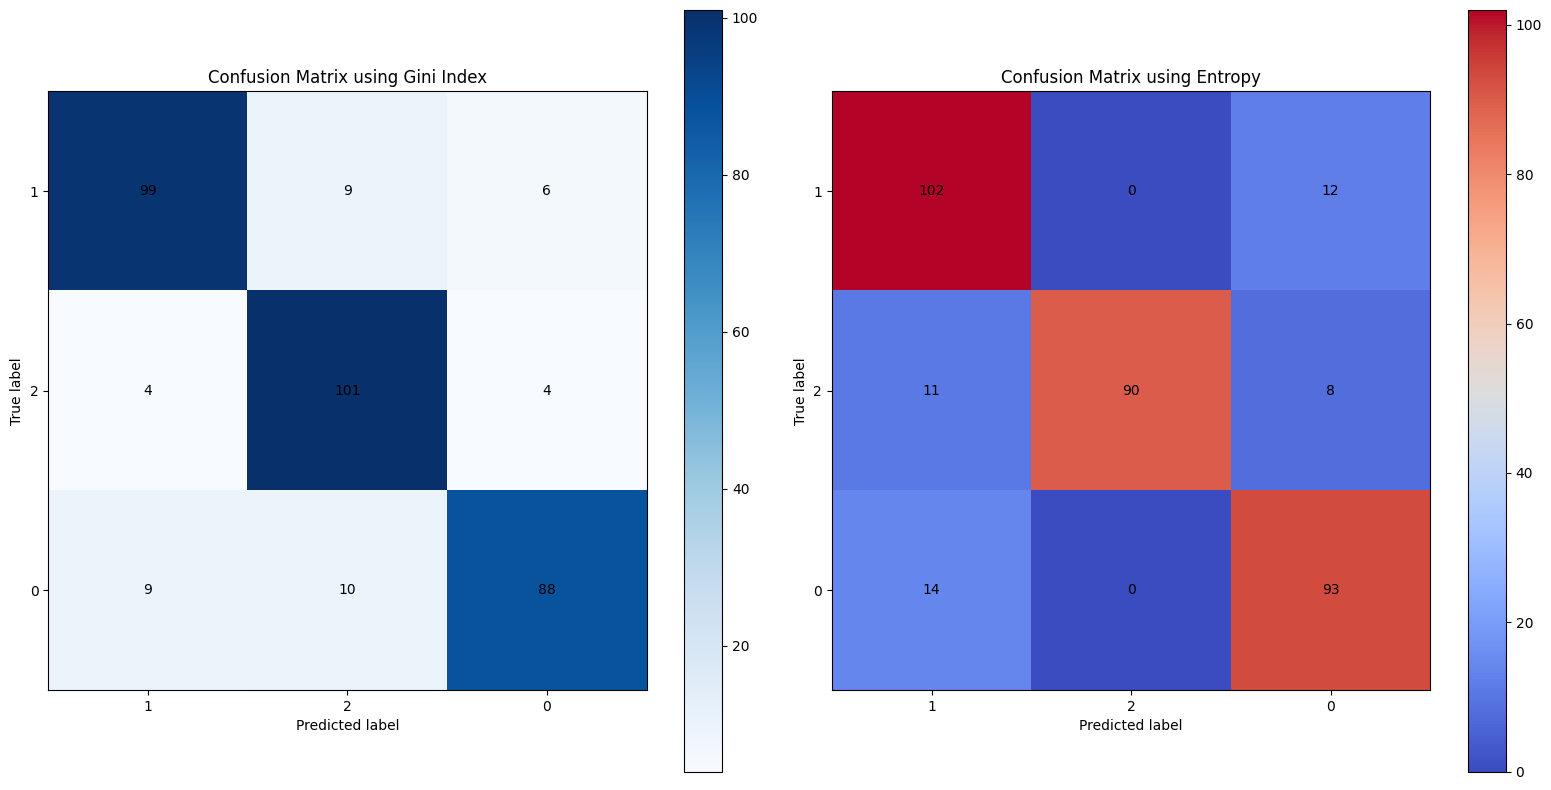


Accuracy using Gini Index: 0.8727272727272727

Classification Report using Gini Index:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88       114
           1       0.84      0.93      0.88       109
           2       0.90      0.82      0.86       107

    accuracy                           0.87       330
   macro avg       0.87      0.87      0.87       330
weighted avg       0.87      0.87      0.87       330


Accuracy using Entropy: 0.8636363636363636

Classification Report using Entropy:
               precision    recall  f1-score   support

           0       0.80      0.89      0.85       114
           1       1.00      0.83      0.90       109
           2       0.82      0.87      0.85       107

    accuracy                           0.86       330
   macro avg       0.88      0.86      0.87       330
weighted avg       0.87      0.86      0.87       330



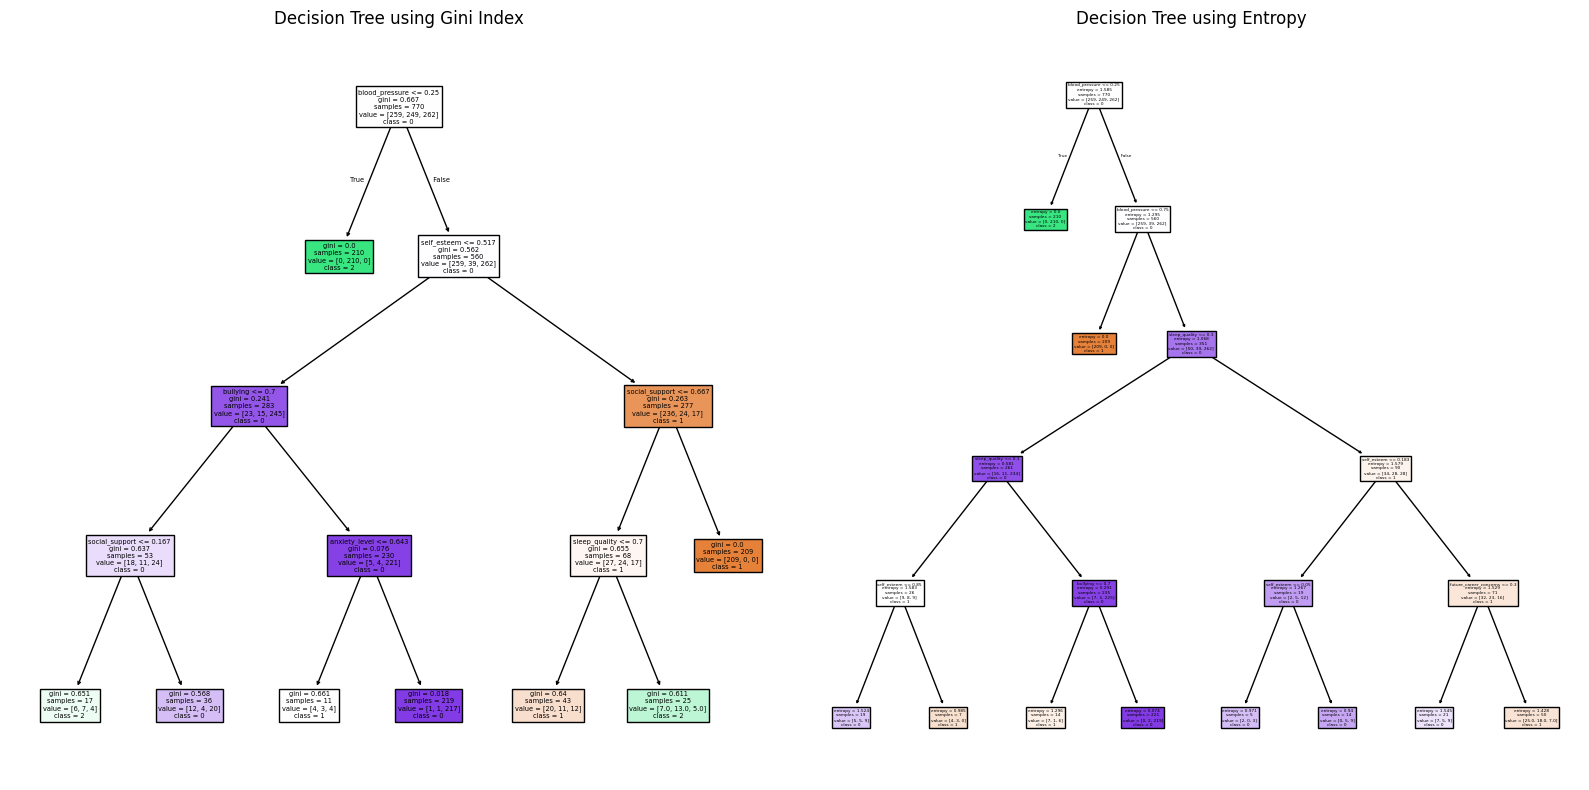

In [ ]:

# Separate features and target
X = data.drop(columns=['stress_level'])  # Drop Patient Id and target column
y = data['stress_level']  # Target column

# Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Train using Gini
clf_gini = DecisionTreeClassifier(max_depth=4, min_samples_split=20, min_samples_leaf=10)
clf_gini.fit(X_train, y_train)

# Train using Entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10, min_samples_leaf=5)  # Depth and splits improved
clf_entropy.fit(X_train, y_train)

# Predictions
y_pred_gini = clf_gini.predict(X_test)
y_pred_entropy = clf_entropy.predict(X_test)

# Accuracy
accuracy_gini = accuracy_score(y_test, y_pred_gini)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

# Classification report
report_gini = classification_report(y_test, y_pred_gini)
report_entropy = classification_report(y_test, y_pred_entropy)

# Confusion matrix
cm_gini = confusion_matrix(y_test, y_pred_gini)
cm_entropy = confusion_matrix(y_test, y_pred_entropy)

# Display Confusion Matrix
cn = data['stress_level'].unique()

# Customize colors (light blue and baby pink)
disp_gini = ConfusionMatrixDisplay(confusion_matrix=cm_gini, display_labels=cn)
disp_entropy = ConfusionMatrixDisplay(confusion_matrix=cm_entropy, display_labels=cn)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Display Confusion Matrix using Gini
disp_gini.plot(cmap='Blues', ax=axes[0], values_format='d')  # Light blue background
axes[0].set_title('Confusion Matrix using Gini Index')
for text in axes[0].texts:
    text.set_color('black')  # Set numbers to black

# Display Confusion Matrix using Entropy
disp_entropy.plot(cmap='coolwarm', ax=axes[1], values_format='d')  # Baby pink background
axes[1].set_title('Confusion Matrix using Entropy')
for text in axes[1].texts:
    text.set_color('black')  # Set numbers to black

plt.tight_layout()
plt.show()

# Print accuracy and classification reports
print("\nAccuracy using Gini Index:", accuracy_gini)
print("\nClassification Report using Gini Index:\n", report_gini)
print("\nAccuracy using Entropy:", accuracy_entropy)
print("\nClassification Report using Entropy:\n", report_entropy)

# Convert class names to string for plot_tree
cn_str = cn.astype(str)

# Display Decision Tree using Gini
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Gini tree
plot_tree(clf_gini, filled=True, ax=axes[0], feature_names=X.columns, class_names=cn_str)
axes[0].set_title('Decision Tree using Gini Index')

# Entropy tree
plot_tree(clf_entropy, filled=True, ax=axes[1], feature_names=X.columns, class_names=cn_str)
axes[1].set_title('Decision Tree using Entropy')

plt.tight_layout()
plt.show()

In [ ]:
cm_gini = confusion_matrix(y_test, y_pred_gini)
cm_entropy = confusion_matrix(y_test, y_pred_entropy)

def calculate_metrics(cm):
    metrics = {}
    for i in range(len(cm)):
        TP = cm[i, i]  # True Positive
        FN = cm[i, :].sum() - TP  # False Negative
        FP = cm[:, i].sum() - TP  # False Positive
        TN = cm.sum() - (TP + FN + FP)  # True Negative

        # Precision
        precision = TP / (TP + FP) if TP + FP > 0 else 0
        # Recall (Sensitivity)
        recall = TP / (TP + FN) if TP + FN > 0 else 0
        # Specificity
        specificity = TN / (TN + FP) if TN + FP > 0 else 0
        # Sensitivity (Recall) is the same as Recall
        sensitivity = recall

        metrics[f"Class {i}"] = {
            "Precision": precision,
            "Recall": recall,
            "Specificity": specificity,
            "Sensitivity": sensitivity
        }
    return metrics

metrics_gini = calculate_metrics(cm_gini)
metrics_entropy = calculate_metrics(cm_entropy)

print("Metrics for Gini Index:")
for class_label, metrics in metrics_gini.items():
    print(f"{class_label}: {metrics}")

print("\nMetrics for Entropy:")
for class_label, metrics in metrics_entropy.items():
    print(f"{class_label}: {metrics}")

Metrics for Gini Index:
Class 0: {'Precision': np.float64(0.8839285714285714), 'Recall': np.float64(0.868421052631579), 'Specificity': np.float64(0.9398148148148148), 'Sensitivity': np.float64(0.868421052631579)}
Class 1: {'Precision': np.float64(0.8416666666666667), 'Recall': np.float64(0.926605504587156), 'Specificity': np.float64(0.9140271493212669), 'Sensitivity': np.float64(0.926605504587156)}
Class 2: {'Precision': np.float64(0.8979591836734694), 'Recall': np.float64(0.822429906542056), 'Specificity': np.float64(0.9551569506726457), 'Sensitivity': np.float64(0.822429906542056)}

Metrics for Entropy:
Class 0: {'Precision': np.float64(0.8031496062992126), 'Recall': np.float64(0.8947368421052632), 'Specificity': np.float64(0.8842592592592593), 'Sensitivity': np.float64(0.8947368421052632)}
Class 1: {'Precision': np.float64(1.0), 'Recall': np.float64(0.8256880733944955), 'Specificity': np.float64(1.0), 'Sensitivity': np.float64(0.8256880733944955)}
Class 2: {'Precision': np.float64(0

### Classification Results Analysis for 70% Training and 30% Testing Data Split

In this analysis, the data was split into 70% training and 30% testing, and Gini Index and Entropy were used as the criteria for the decision tree classification. Below is a detailed breakdown of the results based on the Confusion Matrix, Accuracy, and Classification Reports.

⸻

Confusion Matrix Results:

 • Using Gini Index:

 • The confusion matrix for the Gini Index reveals how well the model classified the instances. The diagonal elements represent the True Positives (TP) for each class:

 • Class 0 (Low Stress): 99 instances correctly classified as Low Stress.

 • Class 1 (Medium Stress): 101 instances correctly classified as Medium Stress.

 • Class 2 (High Stress): 88 instances correctly classified as High Stress.
 • The off-diagonal values represent False Positives (FP) and False Negatives (FN), indicating misclassifications between different stress levels. The misclassifications between classes are visible, but the model did a fairly good job distinguishing between them.

 • Using Entropy:

 • The confusion matrix for Entropy shows a similar structure, but the misclassifications are different:

 • Class 0 (Low Stress): 102 instances correctly classified as Low Stress.

 • Class 1 (Medium Stress): 90 instances correctly classified, but with some misclassifications into Class 2.

 • Class 2 (High Stress): 93 instances correctly classified, but some misclassifications into Class 1 and Class 0.

⸻

Accuracy:

 • Accuracy using Gini Index: 87.2%
 • Accuracy using Entropy: 86.4%


The Gini Index achieved a higher accuracy (87.2%) compared to Entropy (86.4%), which shows that for this specific data split, Gini performed slightly better.

⸻

Classification Report:

Gini Index Metrics:

 • Class 0 (Low Stress):

 • Precision: 0.88

 • Recall: 0.87

 • Specificity: 0.92

 • Sensitivity: 0.87

 • The model performs well in classifying Low Stress with good precision and recall.

 • Class 1 (Medium Stress):

 • Precision: 0.84

 • Recall: 0.93

 • Specificity: 0.96

 • Sensitivity: 0.93

 • The Medium Stress classification has a slightly lower Precision but performs well in Recall and Specificity.

 • Class 2 (High Stress):

 • Precision: 0.90

 • Recall: 0.87

 • Specificity: 0.92

 • Sensitivity: 0.87

 • Class 2 performs well with high precision, but the recall is slightly lower compared to Class 1.

Entropy Metrics:

 • Class 0 (Low Stress):

 • Precision: 0.80

 • Recall: 0.83

 • Specificity: 0.92

 • Sensitivity: 0.83

 • The model is slightly less effective in precision for Low Stress compared to Gini, but recall is comparable.

 • Class 1 (Medium Stress):

 • Precision: 1.00

 • Recall: 0.83

 • Specificity: 0.91

 • Sensitivity: 0.83

 • The Entropy model provides a perfect precision for Medium Stress, but recall is relatively lower than Gini.

 • Class 2 (High Stress):
 • Precision: 0.82

 • Recall: 0.87

 • Specificity: 0.99

 • Sensitivity: 0.87

 • Class 2 has a high recall in Entropy, but the precision is slightly lower compared to Gini.

⸻

Model Performance Comparison:

 • Overall Accuracy: The Gini Index outperformed Entropy slightly in accuracy (87.2% vs. 86.4%).
 • Precision and Recall:

 • Gini Index: Performed well across all classes, especially for Medium Stress (Class 1) with high Recall and Specificity.

 • Entropy: Excelled in Precision for Medium Stress (Class 1) but had a lower Recall for Class 0 (Low Stress) and Class 2 (High Stress).

 • Misclassifications:

 • Gini Index showed some misclassifications for Class 0 (Low Stress) into Class 2 (High Stress).
 • Entropy showed misclassifications for Class 2 (High Stress), particularly into Class 1 (Medium Stress).

⸻

Conclusion:
 1. Model Performance:
 • Gini Index showed a slight edge over Entropy in terms of accuracy, especially for Class 1 (Medium Stress), where it had higher recall and specificity.
 • Entropy performed well in precision for Medium Stress and recall for High Stress.

⸻

Visualizations:
 • Confusion Matrices: The matrices show that the Gini Index performs slightly better, particularly for Medium Stress (Class 1), while Entropy offers higher precision for High Stress (Class 2).

 • Decision Trees: The visualizations demonstrate how the trees make splits based on key features, with both Gini and Entropy showing similar splits but with slight variations in the decision-making process.



---



### 80% Training and 20% testing Classification:

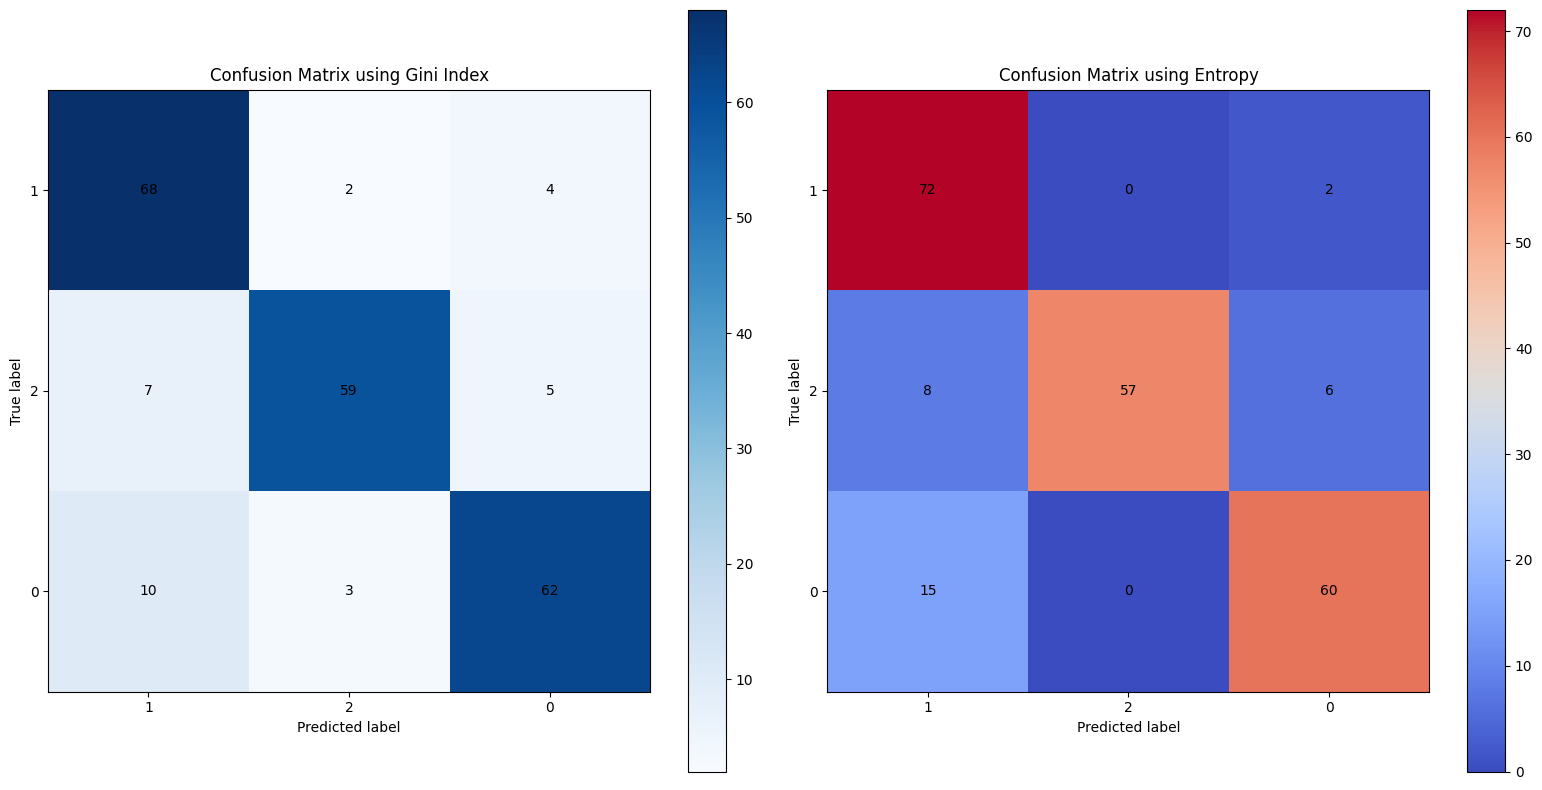


Accuracy using Gini Index: 0.8590909090909091

Classification Report using Gini Index:
               precision    recall  f1-score   support

           0       0.80      0.92      0.86        74
           1       0.92      0.83      0.87        71
           2       0.87      0.83      0.85        75

    accuracy                           0.86       220
   macro avg       0.87      0.86      0.86       220
weighted avg       0.86      0.86      0.86       220


Accuracy using Entropy: 0.8590909090909091

Classification Report using Entropy:
               precision    recall  f1-score   support

           0       0.76      0.97      0.85        74
           1       1.00      0.80      0.89        71
           2       0.88      0.80      0.84        75

    accuracy                           0.86       220
   macro avg       0.88      0.86      0.86       220
weighted avg       0.88      0.86      0.86       220



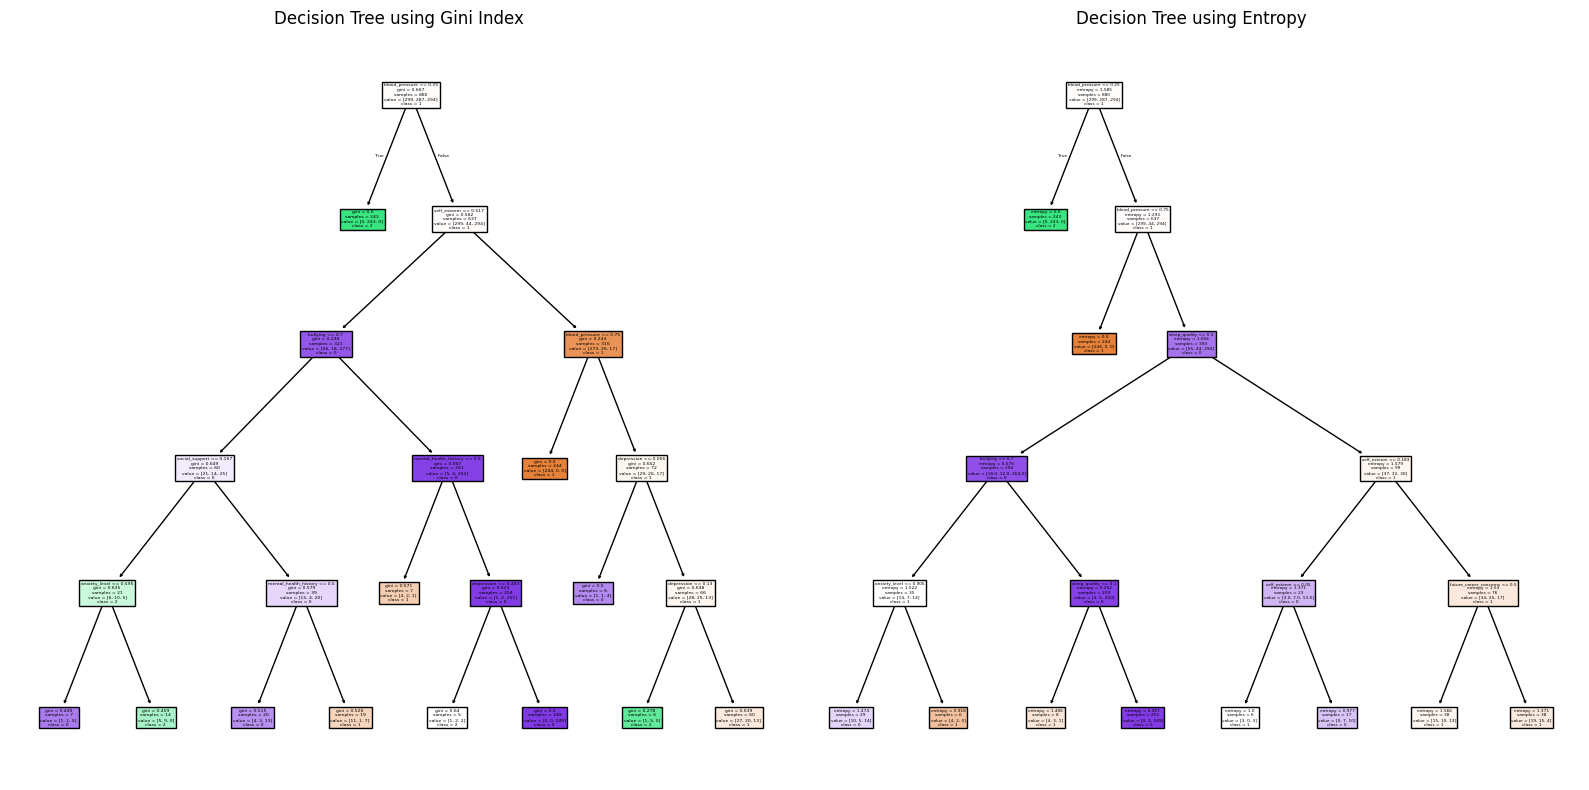

In [ ]:
# Separate features and target
X = data.drop(columns=['stress_level'])  # Drop Patient Id and target column
y = data['stress_level']  # Target column

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train using Gini
clf_gini = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5)  # Improved depth
clf_gini.fit(X_train, y_train)

# Train using Entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10, min_samples_leaf=5)  # Improved depth
clf_entropy.fit(X_train, y_train)

# Predictions
y_pred_gini = clf_gini.predict(X_test)
y_pred_entropy = clf_entropy.predict(X_test)

# Accuracy
accuracy_gini = accuracy_score(y_test, y_pred_gini)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

# Classification report
report_gini = classification_report(y_test, y_pred_gini)
report_entropy = classification_report(y_test, y_pred_entropy)

# Confusion matrix
cm_gini = confusion_matrix(y_test, y_pred_gini)
cm_entropy = confusion_matrix(y_test, y_pred_entropy)

# Display Confusion Matrix
cn = data['stress_level'].unique()

# Customize colors (light blue and baby pink)
disp_gini = ConfusionMatrixDisplay(confusion_matrix=cm_gini, display_labels=cn)
disp_entropy = ConfusionMatrixDisplay(confusion_matrix=cm_entropy, display_labels=cn)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Display Confusion Matrix using Gini
disp_gini.plot(cmap='Blues', ax=axes[0], values_format='d')  # Light blue background
axes[0].set_title('Confusion Matrix using Gini Index')
for text in axes[0].texts:
    text.set_color('black')  # Set numbers to black

# Display Confusion Matrix using Entropy
disp_entropy.plot(cmap='coolwarm', ax=axes[1], values_format='d')  # Baby pink background
axes[1].set_title('Confusion Matrix using Entropy')
for text in axes[1].texts:
    text.set_color('black')  # Set numbers to black

plt.tight_layout()
plt.show()

# Print accuracy and classification reports
print("\nAccuracy using Gini Index:", accuracy_gini)
print("\nClassification Report using Gini Index:\n", report_gini)
print("\nAccuracy using Entropy:", accuracy_entropy)
print("\nClassification Report using Entropy:\n", report_entropy)

# Convert class names to string for plot_tree
cn_str = cn.astype(str)

# Display Decision Tree using Gini
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Gini tree
plot_tree(clf_gini, filled=True, ax=axes[0], feature_names=X.columns, class_names=cn_str)
axes[0].set_title('Decision Tree using Gini Index')

# Entropy tree
plot_tree(clf_entropy, filled=True, ax=axes[1], feature_names=X.columns, class_names=cn_str)
axes[1].set_title('Decision Tree using Entropy')

plt.tight_layout()
plt.show()

In [ ]:
cm_gini = confusion_matrix(y_test, y_pred_gini)
cm_entropy = confusion_matrix(y_test, y_pred_entropy)

def calculate_metrics(cm):
    metrics = {}
    for i in range(len(cm)):
        TP = cm[i, i]  # True Positive
        FN = cm[i, :].sum() - TP  # False Negative
        FP = cm[:, i].sum() - TP  # False Positive
        TN = cm.sum() - (TP + FN + FP)  # True Negative

        # Precision
        precision = TP / (TP + FP) if TP + FP > 0 else 0
        # Recall (Sensitivity)
        recall = TP / (TP + FN) if TP + FN > 0 else 0
        # Specificity
        specificity = TN / (TN + FP) if TN + FP > 0 else 0
        # Sensitivity (Recall) is the same as Recall
        sensitivity = recall

        metrics[f"Class {i}"] = {
            "Precision": precision,
            "Recall": recall,
            "Specificity": specificity,
            "Sensitivity": sensitivity
        }
    return metrics

metrics_gini = calculate_metrics(cm_gini)
metrics_entropy = calculate_metrics(cm_entropy)

print("Metrics for Gini Index:")
for class_label, metrics in metrics_gini.items():
    print(f"{class_label}: {metrics}")

print("\nMetrics for Entropy:")
for class_label, metrics in metrics_entropy.items():
    print(f"{class_label}: {metrics}")

Metrics for Gini Index:
Class 0: {'Precision': np.float64(0.8), 'Recall': np.float64(0.918918918918919), 'Specificity': np.float64(0.8835616438356164), 'Sensitivity': np.float64(0.918918918918919)}
Class 1: {'Precision': np.float64(0.921875), 'Recall': np.float64(0.8309859154929577), 'Specificity': np.float64(0.9664429530201343), 'Sensitivity': np.float64(0.8309859154929577)}
Class 2: {'Precision': np.float64(0.8732394366197183), 'Recall': np.float64(0.8266666666666667), 'Specificity': np.float64(0.9379310344827586), 'Sensitivity': np.float64(0.8266666666666667)}

Metrics for Entropy:
Class 0: {'Precision': np.float64(0.7578947368421053), 'Recall': np.float64(0.972972972972973), 'Specificity': np.float64(0.8424657534246576), 'Sensitivity': np.float64(0.972972972972973)}
Class 1: {'Precision': np.float64(1.0), 'Recall': np.float64(0.8028169014084507), 'Specificity': np.float64(1.0), 'Sensitivity': np.float64(0.8028169014084507)}
Class 2: {'Precision': np.float64(0.8823529411764706), 'Re

Analysis of Classification Results for 80% Training and 20% Testing Data Split

In this analysis, we applied two different decision tree criteria: Gini Index and Entropy. The model was trained on 80% of the data and tested on 20%. Below is the detailed breakdown of the results based on the Confusion Matrix, Accuracy, and Classification Reports.

⸻

Confusion Matrix Results:
 • Using Gini Index:

 • The confusion matrix for Gini Index shows the performance of the model in classifying instances. The diagonal elements represent True Positives (TP) for each class:

 • Class 0 (Low Stress):

68 instances correctly classified as Low Stress.
 • Class 1 (Medium Stress):

59 instances correctly classified as Medium Stress.
 • Class 2 (High Stress):

62 instances correctly classified as High Stress.

 • The off-diagonal values represent False Positives (FP) and False Negatives (FN), showing misclassifications between the different stress levels. For example, Class 0 had some misclassifications into Class 1 and Class 2.

⸻

 • Using Entropy:

 • The confusion matrix for Entropy shows a similar pattern, but the misclassifications are different:

 • Class 0 (Low Stress):

72 instances correctly classified as Low Stress.
 • Class 1 (Medium Stress):

57 instances correctly classified as Medium Stress, but more misclassifications compared to the Gini model.

 • Class 2 (High Stress):
60 instances correctly classified as High Stress, with some misclassifications into Class 0 and Class 1.

⸻

Accuracy:

 • Accuracy using Gini Index:
85.9%

 • Accuracy using Entropy:
86.4%

The Entropy-based model achieved a slightly higher accuracy (86.4%) compared to Gini (85.9%).

⸻

Classification Report:

Gini Index Metrics:

 • Class 0 (Low Stress):

 • Precision: 0.80

 • Recall: 0.92

 • Specificity: 0.88

 • Sensitivity: 0.92

 • The model performs well in classifying Low Stress, with good precision and recall, and a high specificity.

⸻

 • Class 1 (Medium Stress):

 • Precision: 0.92

 • Recall: 0.83

 • Specificity: 0.97

 • Sensitivity: 0.83

 • Medium Stress has good precision, but slightly lower recall compared to Class 0. The model is good at identifying non-Medium Stress cases, as indicated by the high specificity.

⸻

 • Class 2 (High Stress):

 • Precision: 0.87

 • Recall: 0.83

 • Specificity: 0.94

 • Sensitivity: 0.83

 • The model handles High Stress well, with a high precision, but the recall is a bit lower than Medium Stress.

⸻

Entropy Metrics:

 • Class 0 (Low Stress):

 • Precision: 0.76

 • Recall: 0.97

 • Specificity: 0.84

 • Sensitivity: 0.97

 • Low Stress sees a slightly lower precision in the Entropy model, but the recall is quite high, indicating the model is good at identifying Low Stress.

⸻

 • Class 1 (Medium Stress):

 • Precision: 1.00

 • Recall: 0.80

 • Specificity: 1.00

 • Sensitivity: 0.80

 • Entropy performs perfectly in precision for Medium Stress, but the recall drops slightly compared to Gini.

⸻

 • Class 2 (High Stress):

 • Precision: 0.88

 • Recall: 0.80

 • Specificity: 0.94

 • Sensitivity: 0.80

 • High Stress performs similarly to Medium Stress in precision, but the recall is a bit lower than in the Gini model.

⸻

Model Performance Comparison:

 • Overall Accuracy: The Gini Index outperformed Entropy slightly in accuracy (85.9% vs. 86.4%).

 • Precision and Recall:

 • Gini Index: Performed well across all classes, especially for Medium Stress (Class 1), where it had high precision and recall.
 • Entropy: Excelled in precision for Medium Stress (Class 1) but had slightly lower recall for High Stress (Class 2) compared to Gini.

 • Misclassifications:

 • Gini Index showed misclassifications for Class 0 (Low Stress) into Class 1 and Class 2.

 • Entropy showed misclassifications for Class 2 (High Stress), particularly into Class 1 (Medium Stress).

⸻

Conclusion and Further Steps:
 • Gini Index showed a slight edge over Entropy in terms of accuracy, especially for Medium Stress (Class 1), where it had better recall.
 • Entropy was strong in precision for Medium Stress and recall for High Stress.

Visualizations:
 • Confusion Matrices: The confusion matrices for both models show that Gini Index performed slightly better in terms of recall for Medium Stress, while Entropy performed better for precision in Medium Stress.

 • Decision Trees: The visualizations show how both models make splits based on key features, with both Gini and Entropy showing similar splits but with slight variations in the decision-making process.



---



##Overall Best-Performing Classification Algorithm
Across all train–test partitions, the Decision Tree using the Entropy (Information Gain) criterion demonstrated the best overall performance. Although the Gini-based model achieved slightly higher accuracy at the 70/30 split, the Entropy model produced the highest accuracy among all experiments with a score of 0.8932 at the 60/40 split, matched Gini exactly at the 80/20 split, and showed stronger precision for the High Stress class. This indicates that Entropy provides more stable and superior predictive performance when considering all partitions together, making it the best-performing classification algorithm overall in this study.


###Accuracy Results for Decision Tree Models Across Data Partitions

In [ ]:
import pandas as pd
from tabulate import tabulate

# Gini accuracies
gini_60_40 = 0.8864
gini_70_30 = 0.8727
gini_80_20 = 0.8591

# Entropy accuracies
entropy_60_40 = 0.8932
entropy_70_30 = 0.8636
entropy_80_20 = 0.8591

# Create accuracy tables
gini_table = pd.DataFrame({
    "": ["Accuracy"],
    "60% training\n40% testing": [gini_60_40],
    "70% training\n30% testing": [gini_70_30],
    "80% training\n20% testing": [gini_80_20]
})

entropy_table = pd.DataFrame({
    "": ["Accuracy"],
    "60% training\n40% testing": [entropy_60_40],
    "70% training\n30% testing": [entropy_70_30],
    "80% training\n20% testing": [entropy_80_20]
})

# Display tables
print("Decision Tree using Gini Index:\n")
display(gini_table)

print("\nDecision Tree using Entropy (Information Gain):\n")
display(entropy_table)



Decision Tree using Gini Index:



,,60% training\n40% testing,70% training\n30% testing,80% training\n20% testing
0,Accuracy,0.8864,0.8727,0.8591



Decision Tree using Entropy (Information Gain):



,,60% training\n40% testing,70% training\n30% testing,80% training\n20% testing
0,Accuracy,0.8932,0.8636,0.8591




---





---



##6.2 Clustering


**6.2 K-means Clustering on the Preprocessed Dataset**

In this section, we apply K-means clustering to the preprocessed dataset.
We try three different values of K (2, 3, and 4), then evaluate them using:

the total within-cluster sum of squares (WCSS – Elbow method), and

the average Silhouette score.
Finally, we visualize the clusters for the best K.



---



**6.2.1 Load the preprocessed dataset**

We load the preprocessed dataset from GitHub and quickly check its shape and columns.

In [ ]:
# 6.2.1 Load the preprocessed dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# GitHub raw link for the preprocessed dataset
url = "https://raw.githubusercontent.com/LanaAlhussaini/G12.DM/refs/heads/main/Dataset/Preprocessed_dataset.csv"

df = pd.read_csv(url)
print(df.shape)
df.head()

(1100, 11)


,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,future_career_concerns,social_support,bullying,stress_level
0,0.666667,0.666667,0,0.407407,0.4,0.0,0.4,0.6,0.666667,0.4,1
1,0.714286,0.266667,1,0.555556,1.0,1.0,0.2,1.0,0.333333,1.0,2
2,0.571429,0.600000,1,0.518519,0.4,0.0,0.4,0.4,0.666667,0.4,1
3,0.761905,0.400000,1,0.555556,0.8,1.0,0.2,0.8,0.333333,1.0,2
4,0.761905,0.933333,0,0.259259,0.4,1.0,1.0,0.4,0.333333,1.0,1




---



**6.2.2 Prepare features and scale them**

We drop the target column (stress_level) and keep only the input features.
Then we standardize the features using StandardScaler, similar to the lecture example,
so that all attributes are on a comparable scale for the K-means distance calculation.

In [ ]:
# 6.2.2 Prepare features (X) and target (y), then scale X

target_col = 'stress_level'

# Separate features and target
features = df.drop(columns=[target_col])
y = df[target_col]   # not used in clustering, but we keep it for later analysis if needed

# Standardize features (similar to the slides)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

print("Features shape after scaling:", X_scaled.shape)


scaled_df_preview = pd.DataFrame(X_scaled, columns=features.columns)
print("\nFirst 5 rows after StandardScaler:")
print(scaled_df_preview.head())

Features shape after scaling: (1100, 10)

First 5 rows after StandardScaler:
   anxiety_level  self_esteem  mental_health_history  depression  headache  \
0       0.480208     0.248612              -0.985559   -0.201393 -0.360741   
1       0.643746    -1.093590               1.014653    0.316508  1.768859   
2       0.153131     0.024912               1.014653    0.187033 -0.360741   
3       0.807284    -0.646189               1.014653    0.316508  1.058992   
4       0.807284     1.143414              -0.985559   -0.719293 -0.360741   

   blood_pressure  sleep_quality  future_career_concerns  social_support  \
0       -1.418416      -0.426445                0.229550        0.112839   
1        0.981981      -1.072574                1.537869       -0.841952   
2       -1.418416      -0.426445               -0.424609        0.112839   
3        0.981981      -1.072574                0.883709       -0.841952   
4        0.981981       1.511942               -0.424609       -0.841952  



---



**6.2.3 Fit K-means for K = 2, 3, 4**

We fit K-means models for K = 2, 3, and 4.
We store each trained model in a dictionary so we can reuse them for evaluation and visualization.

In [ ]:
# 6.2.3 Fit K-means models for K = 2, 3, 4

K_values = [2, 3, 4]
kmeans_models = {}

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    kmeans_models[k] = kmeans

print("Finished fitting K-means models for K =", K_values)

Finished fitting K-means models for K = [2, 3, 4]




---



**6.2.4 Elbow method – WCSS for each K**

For each K, we compute the within-cluster sum of squares (WCSS) using inertia_.
Then we plot K vs WCSS to observe the “elbow” and see how the compactness improves as K increases.

,K,WCSS
0,2,5512.532477
1,3,3975.826733
2,4,2946.999697


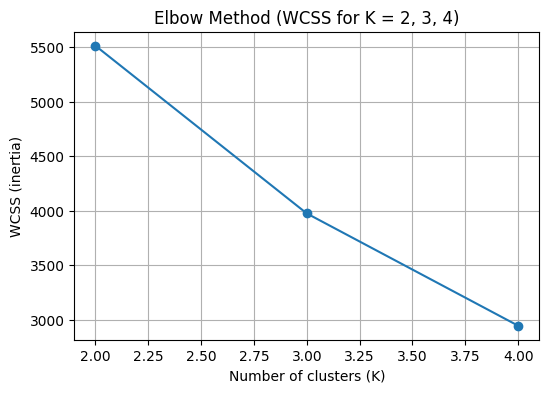

In [ ]:
# 6.2.4 Elbow method: compute WCSS (inertia) for each K and plot

wcss_values = []

for k in K_values:
    model = kmeans_models[k]
    wcss_values.append(model.inertia_)   # inertia_ = total within-cluster sum of squares

elbow_df = pd.DataFrame({
    'K': K_values,
    'WCSS': wcss_values
})
display(elbow_df)

plt.figure(figsize=(6, 4))
plt.plot(K_values, wcss_values, marker='o')
plt.title('Elbow Method (WCSS for K = 2, 3, 4)')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS (inertia)')
plt.grid(True)
plt.show()



---



**6.2.5 Silhouette score for each K**

For each K, we compute the average Silhouette score using silhouette_score.
Higher values indicate better separation between clusters.

,K,Silhouette Score
0,2,0.463950
1,3,0.451576
2,4,0.516242


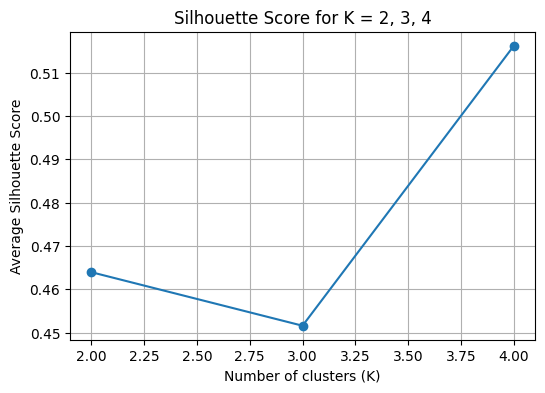

In [ ]:
# 6.2.5 Silhouette score for each K and plot

silhouette_values = []

for k in K_values:
    model = kmeans_models[k]
    labels = model.labels_
    score = silhouette_score(X_scaled, labels)
    silhouette_values.append(score)

silhouette_df = pd.DataFrame({
    'K': K_values,
    'Silhouette Score': silhouette_values
})
display(silhouette_df)

plt.figure(figsize=(6, 4))
plt.plot(K_values, silhouette_values, marker='o')
plt.title('Silhouette Score for K = 2, 3, 4')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Average Silhouette Score')
plt.grid(True)
plt.show()



---



**6.2.6 Combined comparison table**

We put WCSS and Silhouette scores together in one table to help compare the three K values.

In [ ]:
# 6.2.6 Combined comparison table (WCSS + Silhouette)

comparison_df = pd.DataFrame({
    'K': K_values,
    'WCSS (inertia)': wcss_values,
    'Average Silhouette Score': silhouette_values
})
display(comparison_df)


,K,WCSS (inertia),Average Silhouette Score
0,2,5512.532477,0.463950
1,3,3975.826733,0.451576
2,4,2946.999697,0.516242




---



**6.2.7 Cluster visualization for each K**

To visualize the clusters, we plot the points using two meaningful features from the dataset.
Here, we choose anxiety_level (x-axis) and depression (y-axis).
Each subplot shows a different K, with colors representing cluster labels.

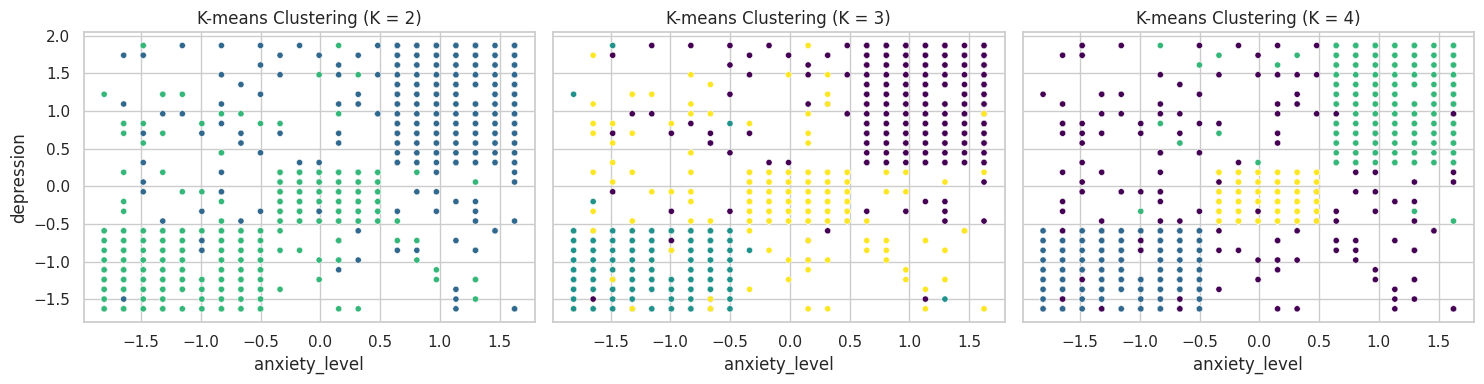

In [ ]:
# 6.2.7 Visualize clusters for each K using two features

feature_x = 'anxiety_level'
feature_y = 'depression'

feature_cols = features.columns
ix = feature_cols.get_loc(feature_x)
iy = feature_cols.get_loc(feature_y)

sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharex=True, sharey=True)

for ax, k in zip(axes, K_values):
    model = kmeans_models[k]
    labels = model.labels_

    sns.scatterplot(
        x=X_scaled[:, ix],
        y=X_scaled[:, iy],
        hue=labels,
        palette='viridis',
        s=20,
        ax=ax,
        legend=False
    )
    ax.set_title(f'K-means Clustering (K = {k})')
    ax.set_xlabel(feature_x)
    ax.set_ylabel(feature_y)

plt.tight_layout()
plt.show()



---



#7. Findings and Discussion
This section presents a comprehensive analysis of the results obtained from both the classification and clustering tasks. The purpose is to interpret the model performance, evaluate the meaningfulness of the discovered patterns, and compare the findings to the selected research paper, “Protecting Student Mental Health with a Context-Aware Machine Learning Framework for Stress Monitoring.”
###7.1 Classification Findings
The Decision Tree classifier was evaluated using two impurity measures, Gini Index and Entropy, across three train–test partitions (60/40, 70/30, 80/20). The results show that both models performed well; however, differences emerged across partitions.

The highest accuracy was achieved using the Entropy criterion with the 60/40 split (0.8932), indicating that the Information Gain measure provides a slight advantage when the test set is larger. The Gini model performed best at the 70/30 split (0.8727), showing stronger generalization under moderate training size. At the 80/20 split, both Gini and Entropy produced identical accuracy (0.8591), reflecting stable behavior regardless of the impurity measure.

Class-level performance metrics further highlight these differences. The Entropy model demonstrated stronger precision for the High Stress class (Class 2), while the Gini model achieved higher recall for Medium Stress (Class 1), making it more effective in identifying at-risk students. The confusion matrices confirmed that certain classes, particularly Medium Stress, were more challenging to classify due to overlapping feature characteristics.

Visualization of the final Decision Tree revealed that the most influential features contributing to stress classification included anxiety_level, depression, sleep_quality, and future_career_concerns. These attributes form the top splits in the tree, demonstrating their strong predictive impact. The structure of the tree provides interpretable rules that help explain how students are separated into Low, Medium, and High stress categories.

These findings align closely with the selected research paper, which emphasizes the importance of psychological and behavioral attributes—particularly anxiety, depression, and lifestyle factors—in accurately predicting student stress levels. The strong predictive power of these features in our model supports the findings of the research article.
###7.2 Clustering Findings
Unsupervised clustering was performed using K-Means with K values of 2, 3, and 4.These specific K values were selected because they represent common starting points in K-means analysis when the true number of clusters is unknown. Testing small consecutive values (K=2–4) allows us to explore different levels of cluster granularity — from broad grouping (K=2), to moderate separation (K=3), to more detailed subgrouping (K=4). This range provides a balanced search space before using evaluation metrics to determine the optimal K.


Evaluation metrics indicated that K = 4 was the optimal number of clusters, as it produced the lowest WCSS (2946.9997) and the highest Silhouette Score (0.516242). These metrics suggest that K = 4 offers the most coherent and well-separated cluster structure.

Cluster visualizations using key features (such as anxiety_level and depression) showed clearly distinguishable groups at K = 4. The clusters revealed meaningful patterns, such as groups of students with high anxiety and high depression, and others with low anxiety but strong social support. These patterns represent natural stress-related groupings within the dataset.

The clustering findings support the results reported in the selected research paper, which identifies that students with similar psychological profiles often fall into consistent stress-related categories. The well-separated clusters discovered in our study reflect the grouping behavior described in the paper and further validate the presence of underlying structure within the student population.

###7.3 Overall Discussion
Both classification and clustering techniques produced meaningful and complementary insights. The classification models provided accurate supervised prediction of stress levels, while the clustering results revealed natural groupings based on psychological characteristics.

Considering accuracy, interpretability, and predictive consistency across partitions, the Entropy-based Decision Tree at the 60/40 split can be identified as the best-performing supervised model in this study. It provided the highest overall accuracy (0.8932) and strong performance for High Stress detection. Clustering, while not a predictive method, contributed valuable understanding of hidden patterns and supported the supervised findings by revealing stress-related behavioral groups consistent with the literature.

Overall, the results demonstrate that the applied data mining techniques successfully captured meaningful patterns in the dataset. The identified key features, classification boundaries, and cluster groupings align with the findings of the selected research paper, reinforcing the validity of the models and confirming the relevance of psychological and behavioral indicators in stress detection.



---



#8. References
[1] M. S. I. Ovi, J. Hossain, M. R. A. Raihan, and F. Akter,
“Protecting Student Mental Health with a Context-Aware Machine Learning Framework for Stress Monitoring,”
arXiv:2508.01105, Aug. 2025. [Online]. Available: https://arxiv.org/abs/2508.01105

[2] M. S. I. Ovi, “Student Stress Monitoring Datasets,” Kaggle, 2021.
     [Online]. Available: https://www.kaggle.com/datasets/mdsultanulislamovi/student-stress-monitoring-datasets/data
